# **Predicting Newsletter Subscription in Minecraft Research Server**

student number: 74745191  
Group number: 33  
Name: Cheryl  
Begin Date: November 4  
Total word account:

In [9]:
library(tidyverse)
library(readr)

## I. Data Description

In [10]:
#Data input and observation

url_players <- "https://raw.githubusercontent.com/cheryldobiki/DS_individual_hw/refs/heads/main/players%20(1).csv"
url_sessions <- "https://raw.githubusercontent.com/cheryldobiki/DS_individual_hw/refs/heads/main/sessions%20(1).csv"
players <- read_csv(url_players)
sessions <- read_csv(url_sessions)
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**Data Description:**

The dataset was collected from a UBC Minecraft research server that records player activity. It includes two files: **players.csv** and **sessions.csv**.

#### players.csv
- 196 observations, 7 variables  
- Contains basic information of players

| Variable | Type | Description |
|-----------|------|-------------|
| experience | chr | Player’s experience level (e.g., Pro, Amateur) |
| subscribe | lgl | Whether the player subscribed to the newsletter |
| hashedEmail | chr | Unique encrypted player ID |
| played_hours | dbl | Total number of hours played |
| name | chr | Player’s display name |
| gender | chr | Player’s gender |
| Age | dbl | Player’s age in years |

#### sessions.csv
- 1,535 observations, 5 variables  
- Records play time of players and their ID

| Variable | Type | Description |
|-----------|------|-------------|
| hashedEmail | chr | Player identifier |
| start_time / end_time | chr | Session start and end times |
| original_start_time / end_time | dbl | The raw data automatically collected from the server|

##### Data quality and potential problems
- `played_hours` has value of 0.0, means some of the players may not open the games.
- `name`are useless data

## II.Questions

**Broad Question：** 

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?


**Specific Question：**   

How do `player experience level` and `total playtime for each player` influence the `subscribing to game-related newsletter`, and does this relationship differ between `different experience levels`?

**Explanation**

To address this question, we will use information from both datasets:

1.
From players.csv, use **player experience** `pro`,`veteran`,`regular`,`amateur` as the explanatory variable.
2.
From players.csv, use **subscribe** (`TRUE/FALSE`) as the response variable.

This approach allows us to examine how both experience level and actual playtime relate to newsletter subscription.


## III.Exploratory Data Analysis and Visualization

In [11]:
players_mean <- players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

players_mean

played_hours,Age
<dbl>,<dbl>
5.85,21.14


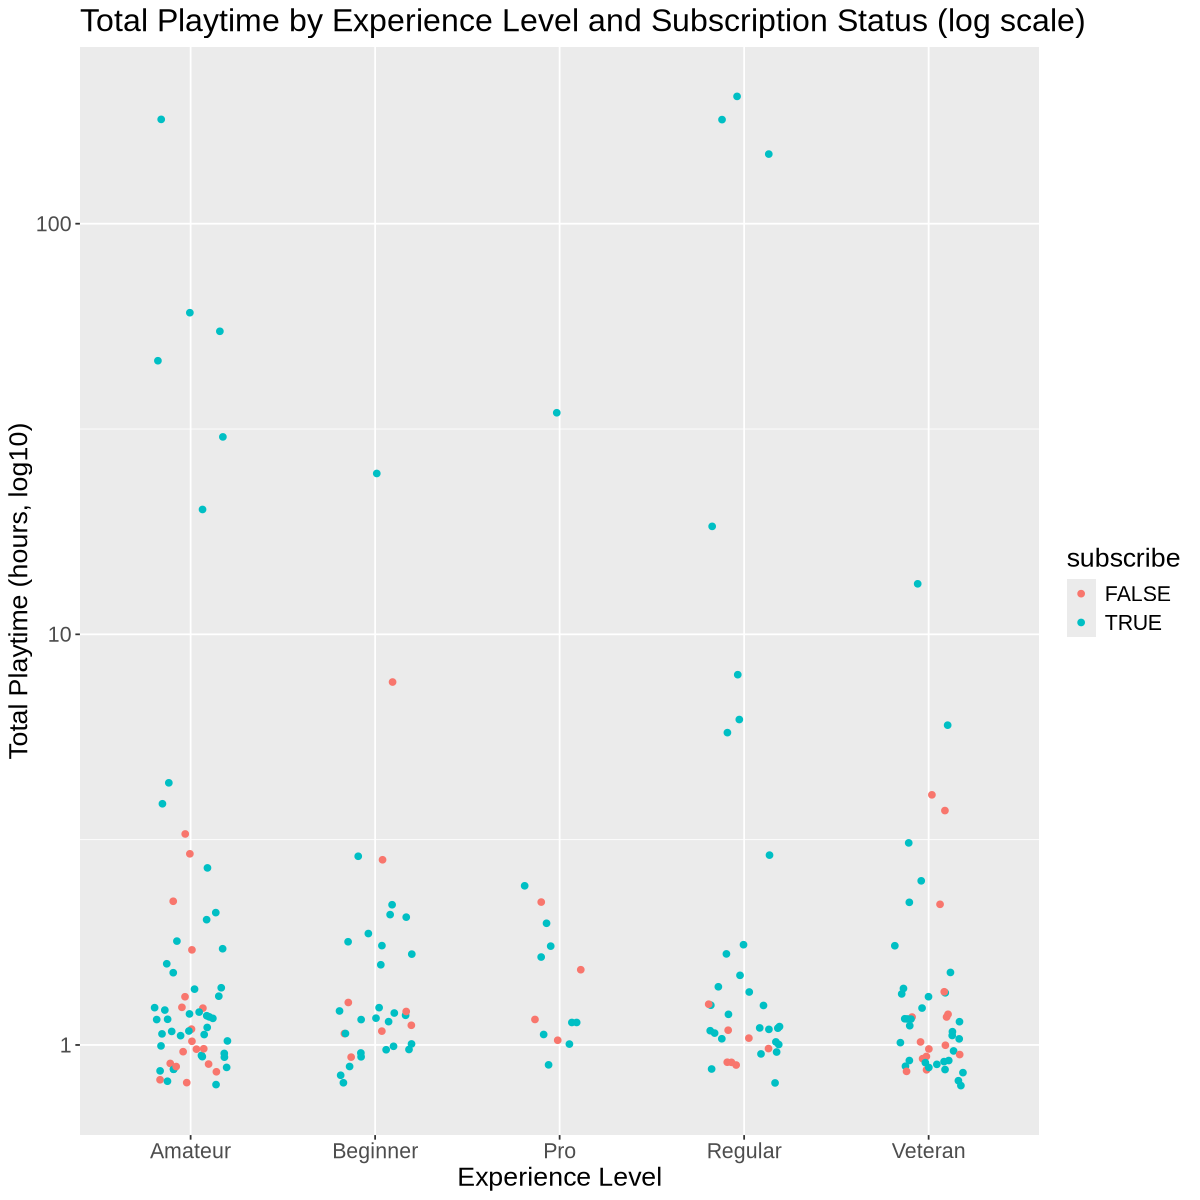

In [13]:
options(repr.plot.width =10, repr.plot.height =10)
ggplot(players, aes(x = experience, y = played_hours + 1, color = subscribe)) +
  geom_point(position = position_jitter(width = 0.2, height = 0.1)) +
  scale_y_log10() +
  labs(title = "Total Playtime by Experience Level and Subscription Status (log scale)",
       x = "Experience Level",
       y = "Total Playtime (hours, log10)") +
  theme(text = element_text(size=16))

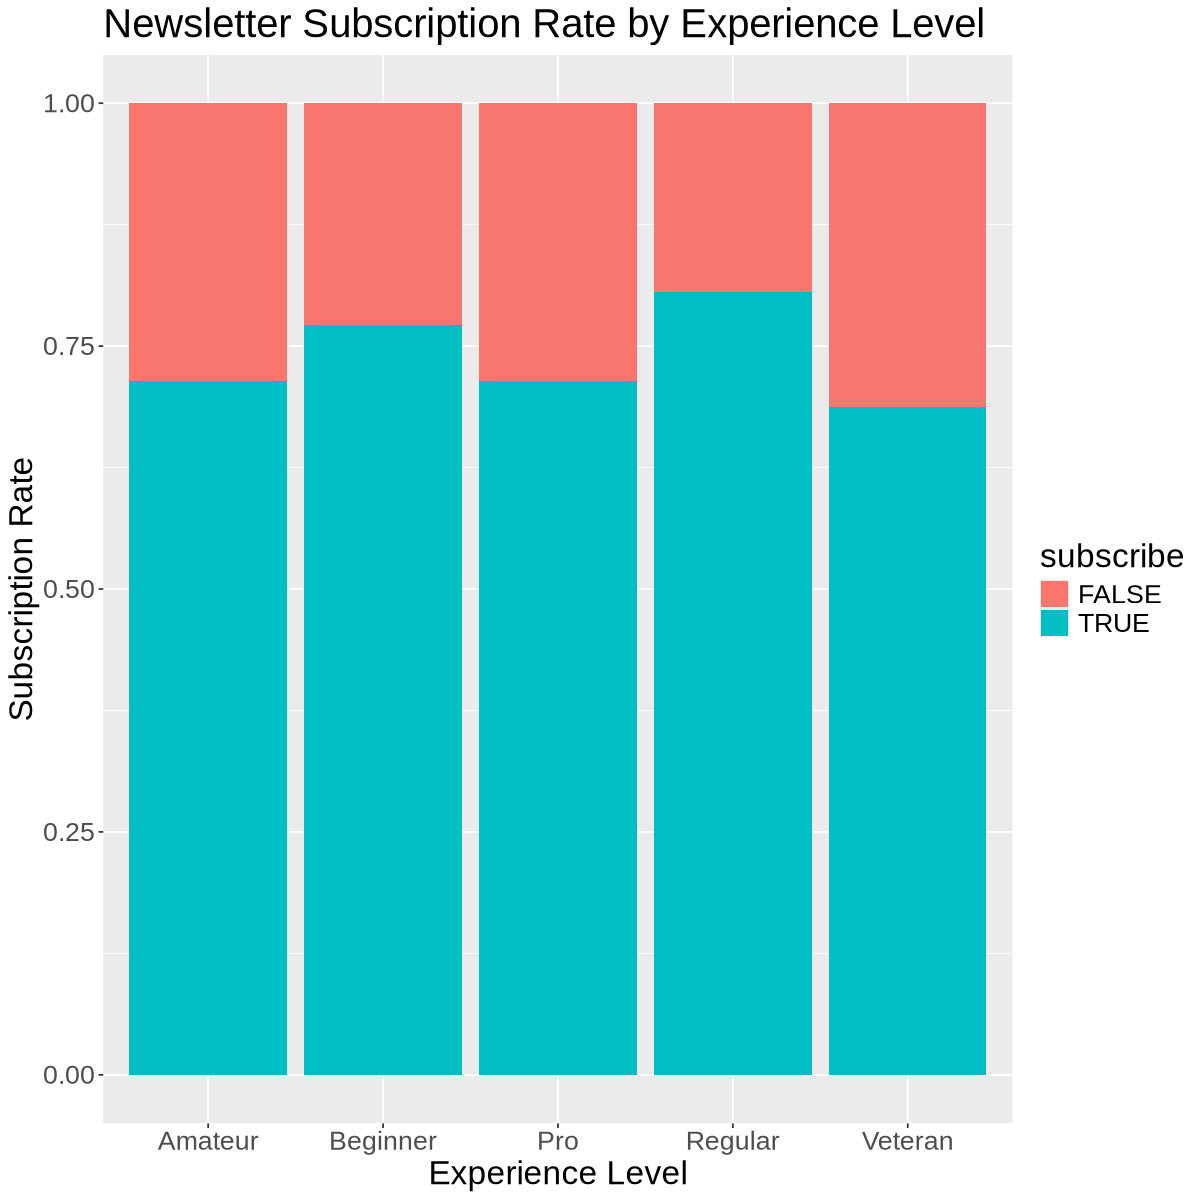

In [7]:
options(repr.plot.width =10, repr.plot.height =10)

experience_level_plot<- ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Newsletter Subscription Rate by Experience Level",
    x = "Experience Level",
    y = "Subscription Rate")+
   theme(text = element_text(size=20))
experience_level_plot

## IV.Methods and Plan

In this project, I will employ the KNN classification model to investigate whether players' experience levels and total game playtime influence their likelihood of subscribing to game-related emails. Since my target variable is binary (subscribed or not subscribed), and KNN can be directly applied to classification, it is more suitable for addressing this type of question than linear regression. 

The main assumption of KNN is that similar players will have similar behaviors, so players who are closer in the feature space usually have similar subscription outcomes. However, this method also has limitations, such as being sensitive to noise and being greatly influenced by the choice of K value.  

To select the best-performing model, I will use cross-validation in the training set to determine the optimal K value and compare the prediction accuracy under different K values. The data will be split into a 70% training set and a 30% test set according to the common ratio. The training set is used for model fitting and cross-validation, while the final model performance will be evaluated on the test set to ensure that the model has good generalization ability.

## V. GitHub Repository

https://github.com/cheryldobiki/DS_individual_hw.git